### 读取数据

In [6]:
import pandas as pd
import numpy as np

# 指定csv中的分隔符是逗号
data = pd.read_csv("./Data/insurance.csv",sep=",")
data.head(n=6)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160

### EDA

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

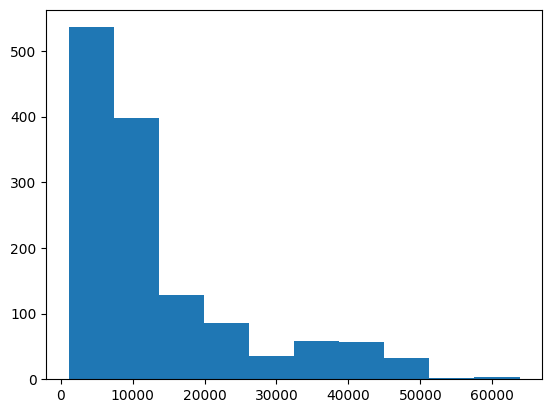

In [9]:
plt.hist(data['charges'])

数据出现了右偏，我们需要使用log来矫正，因为我们线性回归的假设前提是数据是正态分布的

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

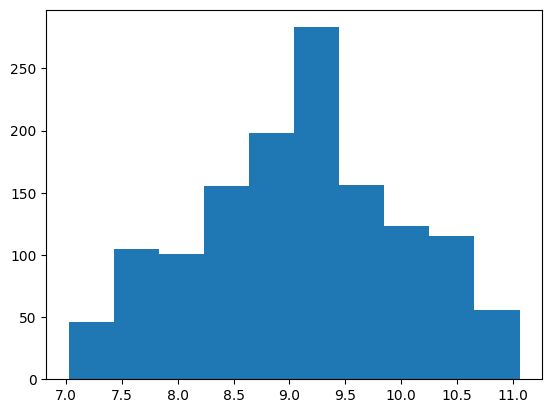

In [10]:
plt.hist(np.log(data['charges']))

### 特征工程

对于原始的数据集，我们可以看到像性别这一栏是字符型的，所以我们需要转换它，这里使用的是one-hot独热编码，分成多维，例如男就是10，女就是01

In [11]:
# 实现独热编码
data = pd.get_dummies(data)
data.head()

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False

In [12]:
# 排除目标列，构建自变量数据集
x = data.drop('charges',axis=1)
x.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False

In [13]:
y = data['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
# 填充数据集中的空值
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True).fit(x_train)

In [17]:
# 对测试集和训练集进行归一化
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-1.43448073, -0.95403588, -0.92723081, ..., -0.55266566,
        -0.60862517,  1.73699953],
       [ 0.36265221, -0.66754561, -0.92723081, ...,  1.80941223,
        -0.60862517, -0.57570539],
       [-0.28431565, -0.44471986,  0.74500048, ..., -0.55266566,
        -0.60862517, -0.57570539],
       ...,
       [ 1.08150538, -0.25372635,  0.74500048, ..., -0.55266566,
        -0.60862517, -0.57570539],
       [-0.28431565,  0.63925207, -0.09111517, ..., -0.55266566,
         1.6430474 , -0.57570539],
       [-0.42808628, -0.35592463, -0.09111517, ..., -0.55266566,
         1.6430474 , -0.57570539]])